In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dqn_traing_df = pd.read_csv('training_dqn.csv', index_col=0)
dqn_testing_df = pd.read_csv('testing_dqn.csv', index_col=0)
dyna_training_df = pd.read_csv('dyna_model2/episode_results.csv', index_col=0)
dyna_testing_df = pd.read_csv('dyna_model2/test_results.csv', index_col=0)
print(dqn_traing_df.columns)
print(dqn_testing_df.columns)
print(dyna_training_df.columns)
print(dyna_testing_df.columns)

Index(['episode_durations_dqn_aux', 'episode_durations_dqn_rnd'], dtype='object')
Index(['episode_durations_dqn_aux', 'episode_durations_dqn_rnd'], dtype='object')
Index(['reward', 'duration', 'qstep'], dtype='object')
Index(['reward', 'duration'], dtype='object')


In [12]:
# Merge the testing and training dataframes
dqn_traing_df['epsiode_durations_dyna'] = dyna_training_df['duration']
dqn_testing_df['epsiode_durations_dyna'] = dyna_testing_df['duration']

<Axes: xlabel='episode'>

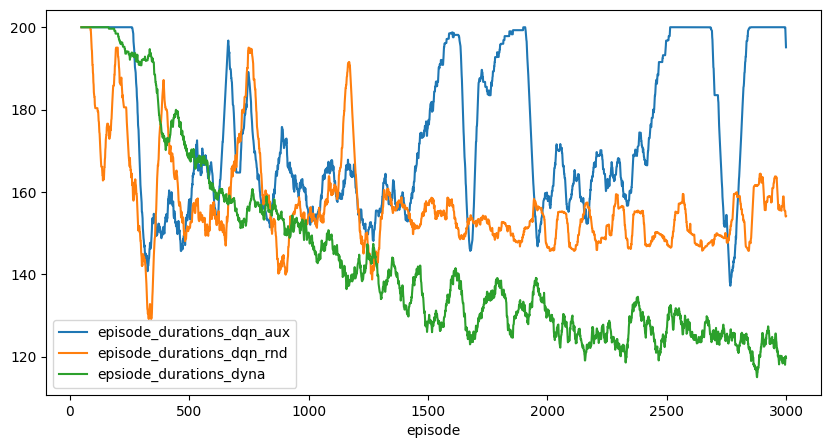

In [13]:
dqn_traing_df.rolling(window=50).mean().plot(figsize=(10, 5))

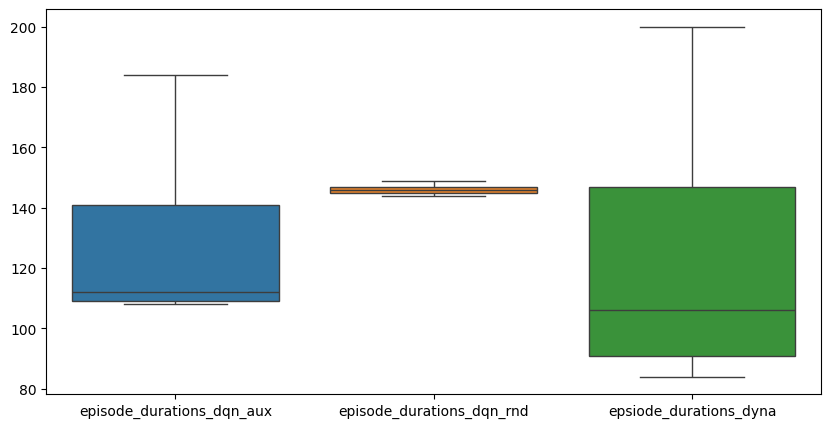

,episode_durations_dqn_aux,episode_durations_dqn_rnd,epsiode_durations_dyna
count,1000.000000,1000.000000,1000.000000
mean,123.059000,145.862000,116.097000
std,17.829734,1.222477,28.469494
min,108.000000,144.000000,84.000000
25%,109.000000,145.000000,91.000000
50%,112.000000,146.000000,106.000000
75%,141.000000,147.000000,147.000000
max,184.000000,149.000000,200.000000


In [23]:
from scipy.__config__ import show


fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=dqn_testing_df, showfliers=False, ax=ax)
plt.show()

dqn_testing_df.describe()